In [2]:
### Some helpful data: Image size is  (2048, 2048, 3)

### Import library
import cv2 as cv
from cv2 import IMWRITE_JPEG2000_COMPRESSION_X1000
from cv2 import THRESH_BINARY
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import find_peaks
from scipy.stats import linregress
import math
import pwlf

## Basic funtions

def get_array(file):    #I don't know why this is not imported
    return cv.imread(file)

def rescale(img, scale = 0.75):
    width = int (img.shape[1]*scale)
    height = int (img.shape[0]*scale)

    dimensions = (width,height)

    return cv.resize(img, dimensions, interpolation=cv.INTER_AREA)

def canny_edge (img):
    edges = cv.Canny(img,10,50) #Arguments:  1) input image, 2) minVal, 3) maxVal, 4) aperture size (default = 3), 5) L2gradient
    return edges

In [49]:
### Other function tools to process

### Some definitions:
### Kernel: matrix that defines size of convolution, weights applied and an anchor point
### Convolutions: mathematical operations between two functions that create a third function. In OpenCV

def segment_identifier(img, n_segments=3):

    x = np.arange(0, img.shape[1])
    y = np.array(list(np.mean(img[:,j]) for j in range(0,img.shape[1])))
    
    my_pwlf = pwlf.PiecewiseLinFit(x, y)
    return my_pwlf.fit(n_segments)

def img_separator(img):
    segment = segment_identifier(img)
    mid = int((segment[1]+segment[2])/2)

    img_left = img[:, :mid+50] ### margin of 50 pixel
    img_right = img[:, mid-50:]
    return img_left, img_right

def img_join(img_left, img_right, margin = 50):
    img1 = img_left[:, :img_left.shape[1]-margin] 
    img2 = img_right[:, margin:]
    new_image = np.concatenate((img1, img2), axis = 1)
    return new_image

def get_contours (img, chip_img = True):
    thickness = 2 ### thickness of the contour line
    contours, hierarchies = cv.findContours(img,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
    blank = np.zeros(img.shape, dtype = 'uint8')
    cv.drawContours(blank, contours, -1, (255,255,255), thickness=thickness)
    ### In case of the chip image, need to remove the midline
    if chip_img:
        # if min(blank[:, -thickness:].ravel()) == 255:
        blank[:, -thickness:] = 0
    return blank

def add_text(img, text):
    imageText = img.copy()
    fontScale = 2.3
    fontFace = cv.FONT_HERSHEY_PLAIN
    fontColor = (255, 255, 255)
    fontThickness = 2

    cv.putText(imageText, text, (0, img.shape[0]), fontFace, fontScale, fontColor, fontThickness, cv.LINE_AA)
    return imageText

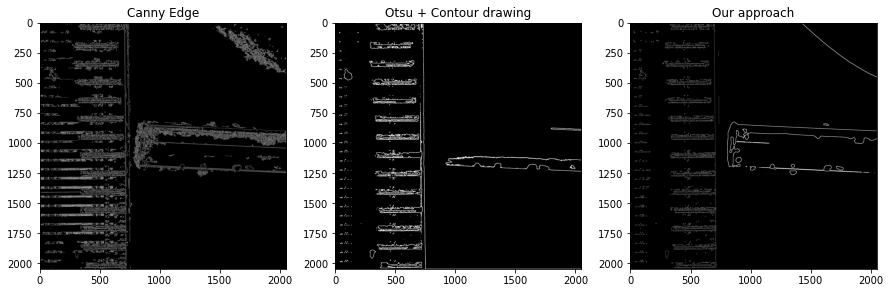

In [54]:
### Preprocessing: Grey scale, blur, split image to get fiber and concatenate images

array1 = get_array('C:/Users/MARIELENA/visionautomation/Photos/Photo_Fiber_Obj_10X.tif')

#cv.imshow('Original image', rescale(array, scale = 0.48))
gray = cv.cvtColor(array1, cv.COLOR_BGR2GRAY)
#blur = cv.GaussianBlur(gray,(5,5),cv.BORDER_DEFAULT) 
otsuthreshold, otsuimage = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
otsuimage = get_contours(otsuimage)
img_left, img_right = img_separator (blur)
leftimage = canny_edge(img_left)
rightthreshold, rightimage = cv.threshold(img_right,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
rightimage = get_contours(rightimage)
finalimage = img_join(leftimage, rightimage, 50)


plt.figure(figsize=[15, 5])
plt.subplot(131); plt.imshow(canny_edge(gray), cmap='gray')
plt.title("Canny Edge")
plt.subplot(132); plt.imshow(otsuimage, cmap='gray') 
plt.title("Otsu + Contour drawing")
plt.subplot(133); plt.imshow(finalimage, cmap='gray')
plt.title("Our approach") 
plt.show()

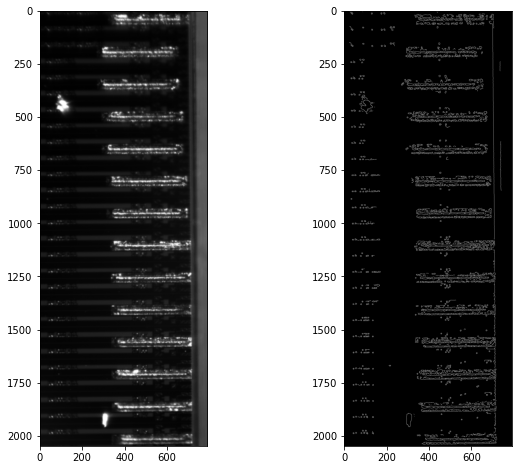

In [8]:
### Preprocessing: Grey scale, blur, split image to get fiber and concatenate images

array1 = get_array('C:/Users/MARIELENA/visionautomation/Photos/Photo_Fiber_Obj_10X.tif')
array2 = get_array('C:/Users/MARIELENA/visionautomation/Photos/Photo_Fiber_Obj_20X.tif') # I will keep this, as another example

#cv.imshow('Original image', rescale(array, scale = 0.48))
gray1 = cv.cvtColor(array1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(array2, cv.COLOR_BGR2GRAY)
blur1 = cv.GaussianBlur(gray1,(5,5),cv.BORDER_DEFAULT)  
blur2 = cv.GaussianBlur(gray2,(5,5),cv.BORDER_DEFAULT)  

img_left1, img_right1 = img_separator (blur1)
img_left2, img_right2 = img_separator (blur2)

plt.figure(figsize=[10, 8])
plt.subplot(121); plt.imshow(img_left1, cmap='gray')
plt.subplot(122); plt.imshow(canny_edge(img_left1), cmap='gray') #Remember: 256 is white
plt.show()

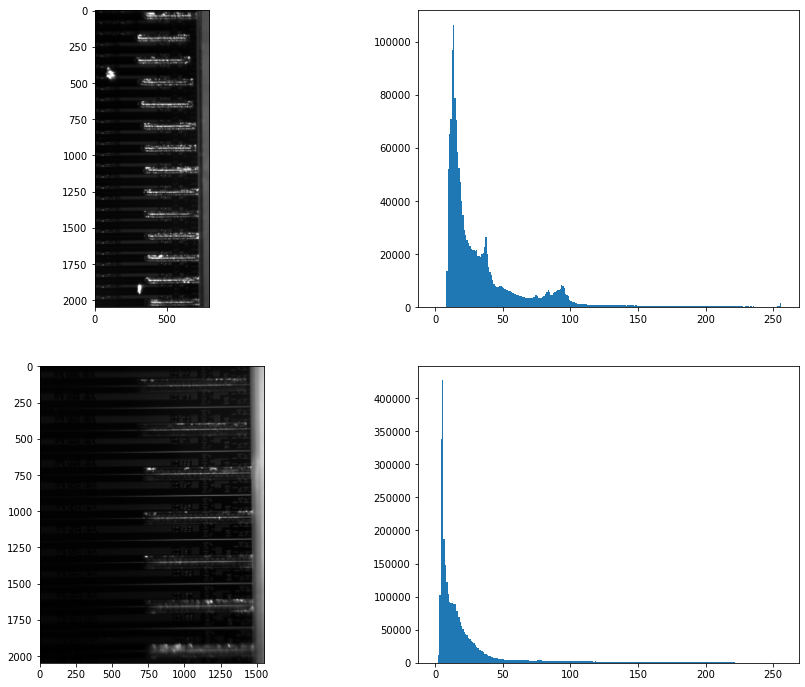

In [11]:
### Preprocessing: Grey scale, blur, split image to get fiber and concatenate images

array1 = get_array('C:/Users/MARIELENA/visionautomation/Photos/Photo_Fiber_Obj_10X.tif')
array2 = get_array('C:/Users/MARIELENA/visionautomation/Photos/Photo_Fiber_Obj_20X.tif') # I will keep this, as another example

#cv.imshow('Original image', rescale(array, scale = 0.48))
gray1 = cv.cvtColor(array1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(array2, cv.COLOR_BGR2GRAY)
blur1 = cv.GaussianBlur(gray1,(5,5),cv.BORDER_DEFAULT)  
blur2 = cv.GaussianBlur(gray2,(5,5),cv.BORDER_DEFAULT)  

img_left1, img_right1 = img_separator (blur1)
img_left2, img_right2 = img_separator (blur2)


plt.figure(figsize=[15,12])
plt.subplot(221); plt.imshow(img_left1, cmap='gray')
plt.subplot(222); plt.hist(img_left1.ravel(), 256, [0,256]) #Remember: 256 is white
plt.subplot(223); plt.imshow(img_left2, cmap='gray')
plt.subplot(224); plt.hist(img_left2.ravel(), 256, [0,256]) ##second 
plt.show()


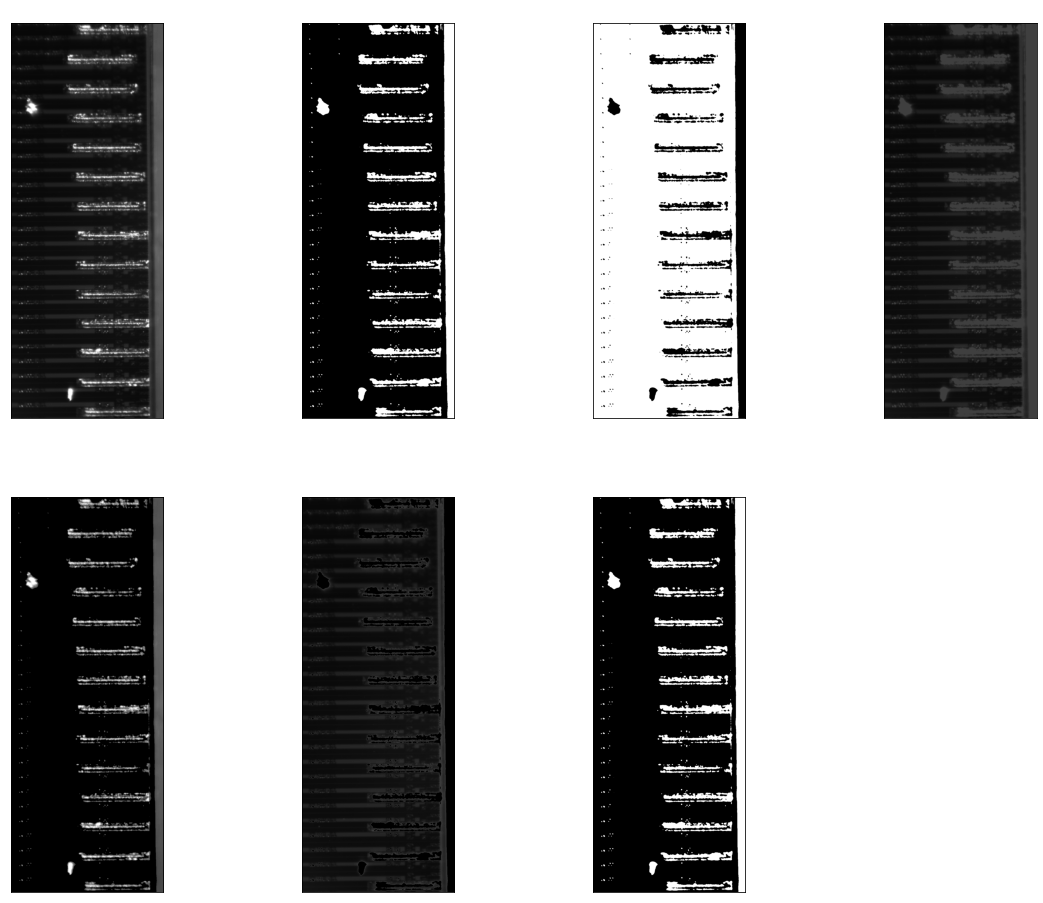

In [12]:
### Basic thresholding of first figure
 
thresh = 63 ## follow histogram to find a good value
x = 11
y = 2

ret1,thresh1 = cv.threshold(img_left1,thresh,255,cv.THRESH_BINARY)
ret2,thresh2 = cv.threshold(img_left1,thresh,255,cv.THRESH_BINARY_INV)
ret3,thresh3 = cv.threshold(img_left1,thresh,255,cv.THRESH_TRUNC)
ret4,thresh4 = cv.threshold(img_left1,thresh,255,cv.THRESH_TOZERO)
ret5,thresh5 = cv.threshold(img_left1,thresh,255,cv.THRESH_TOZERO_INV)
ret6,thresh6 = cv.threshold(img_left1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#print( "{} {}".format(thresh6,ret6) )

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV','OTSU']
images = [img_left1, thresh1, thresh2, thresh3, thresh4, thresh5, thresh6]

plt.figure(figsize=[20,16])
for i in range(7):
    plt.subplot(2,4,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i], color = 'white')
    plt.xticks([]),plt.yticks([])
plt.show()


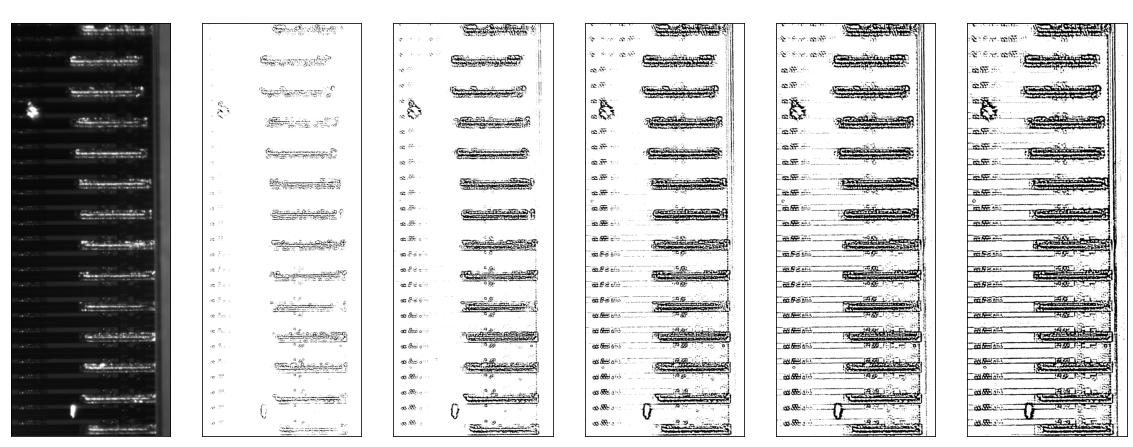

In [13]:
### Adaptive Thresholding of first figure varying only blocksize
 
bs = [3, 5, 7, 9, 11] ##blocksize x blocksize
c = 2

titles = ['Original Image','BS=3','BS=5','BS=7','BS=9','BS=11']
images = []

images.append(img_left1)

plt.figure(figsize=[20,16])
for i in range(6):
    if i != 0:
        images.append(cv.adaptiveThreshold(img_left1,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,bs[i-1],c))
    plt.subplot(1,6,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i], color = 'white')
    plt.xticks([]),plt.yticks([])
plt.show()


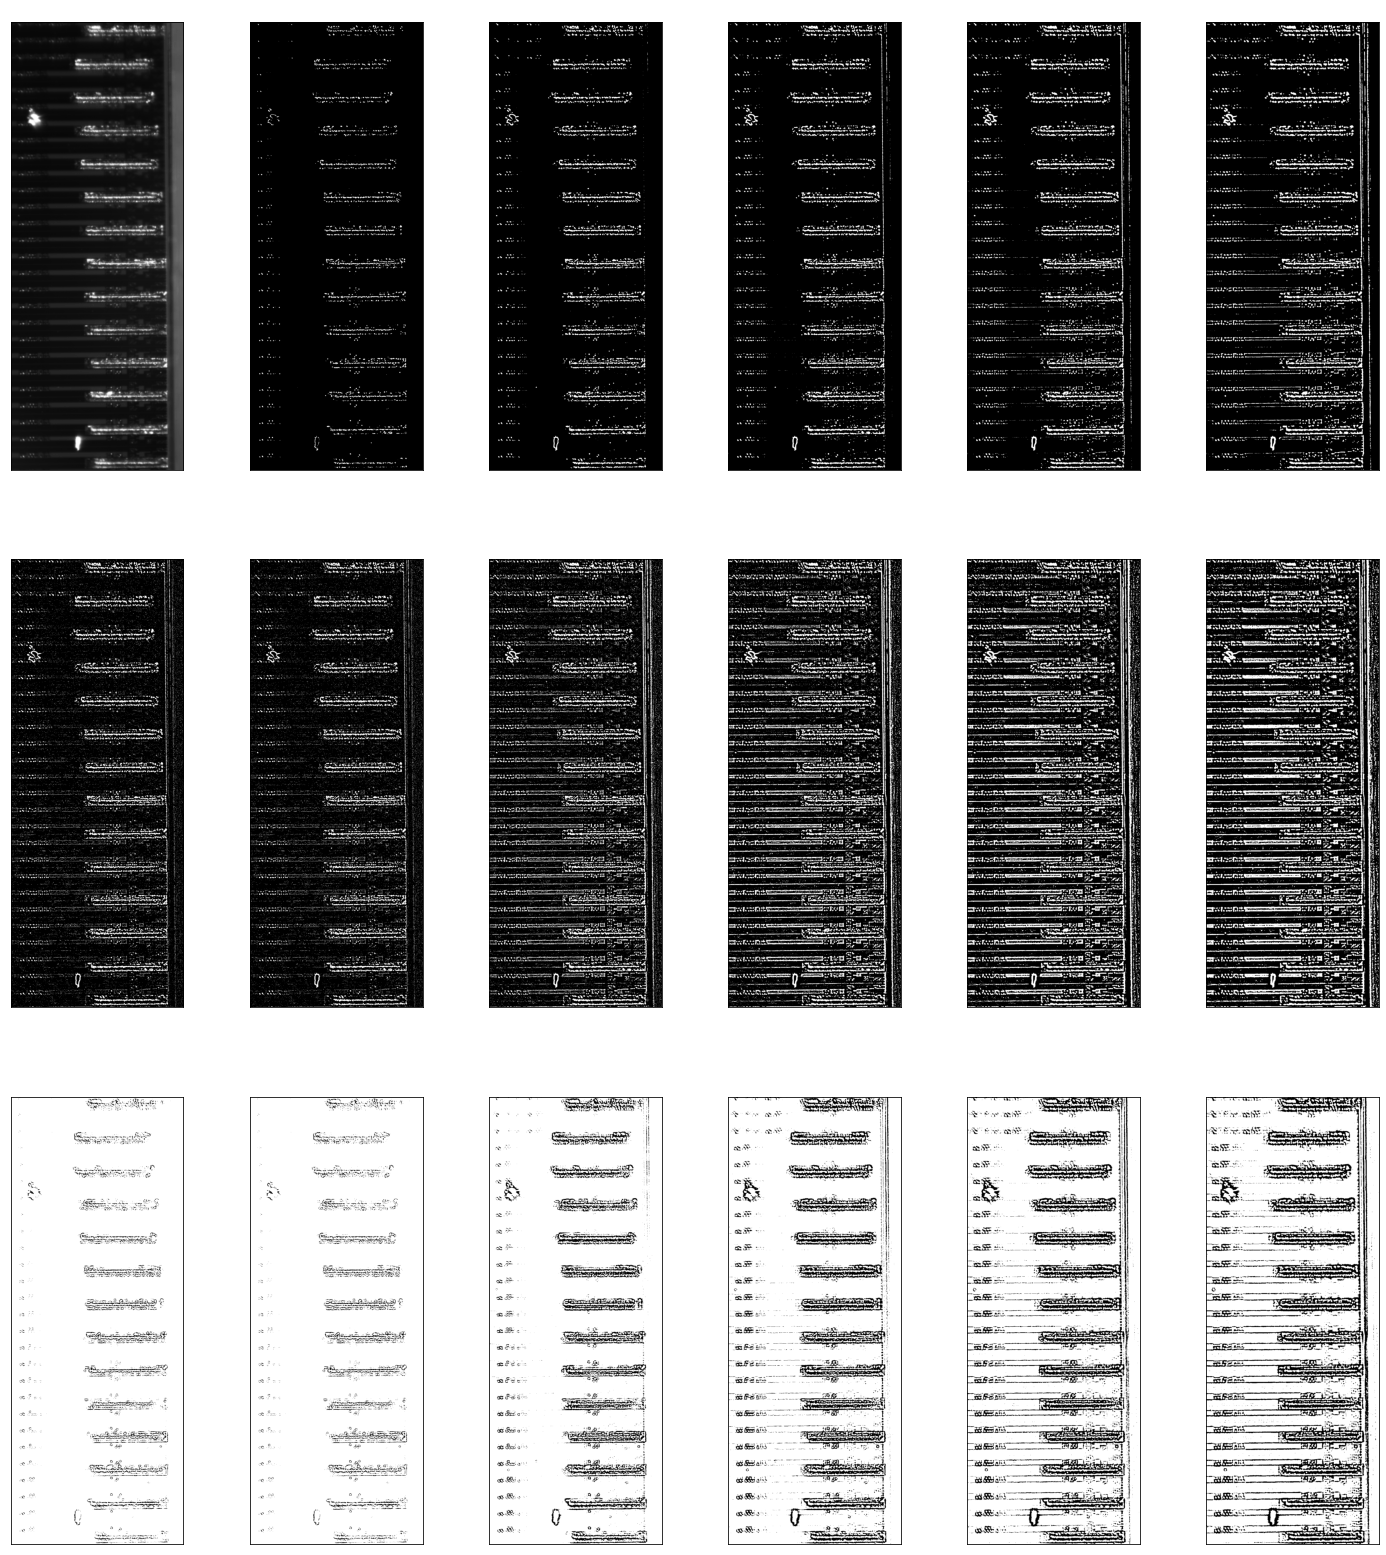

In [14]:
### Adaptive Thresholding of first figure, varying both parameters
 
bs = [3, 5, 7, 9, 11] ##blocksize x blocksize
c = [-2, 0, 2] ##pixel

titles = ['Original Image','BS=3','BS=5','BS=7','BS=9','BS=11']
images = []

images.append(img_left1)

plt.figure(figsize=[25,28])
for j in range(3):
    for i in range(6):
        if i != 0 & j==0:
            images.append(cv.adaptiveThreshold(img_left1,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,bs[i-1],c[j]))
        elif j > 0:
            images.append(cv.adaptiveThreshold(img_left1,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,bs[i],c[j]))
        plt.subplot(3,6,6*j+i+1),plt.imshow(images[6*j+i],'gray',vmin=0,vmax=255)
        if j==0:
            plt.title(titles[i], color = 'white')
        plt.xticks([]),plt.yticks([])
    #plt.show()
plt.show()

5


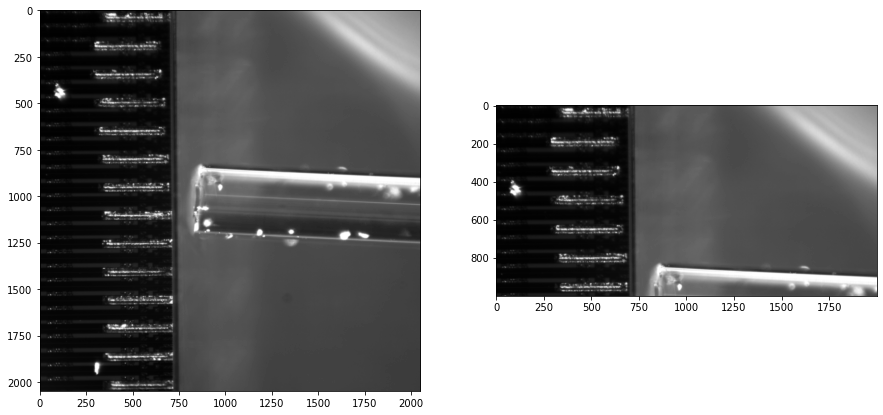

In [15]:
### Area of interest

## Assigning values
#x = 0; 
x = input('Enter x: ')
print(x)
x = int(x)
w = 2000
y = 0; h = 1000 
sub_image = blur1[y:y+h, x:x+w]

plt.figure(figsize=[15,12])
plt.subplot(121); plt.imshow(blur1, cmap='gray')
plt.subplot(122); plt.imshow(sub_image, cmap='gray')
plt.show()


349   350


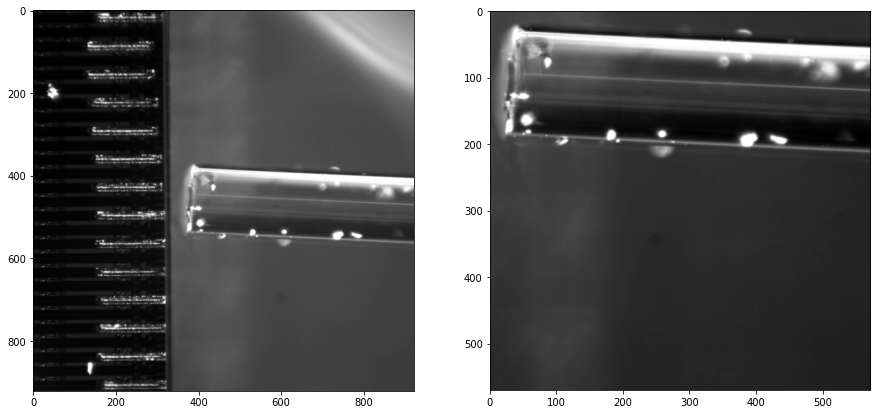

In [16]:
### Area of interest

## Coordinate x and y from click // click event

img = rescale (blur1,0.45)

def click_event (event, x, y, flags, params):
    global coord  #otherwise x and y values stay in this function
    if event == cv.EVENT_LBUTTONDOWN: # detecting only left bottom event
        print (x, ' ', y) # printing coordinates
        coord =[(x,y)]

cv.imshow('Click on pic',img) #if rescaling, you 
cv.setMouseCallback('Click on pic', click_event)
cv.waitKey(0)

x = coord[0][0]
y = coord[0][1]

w = 2000; h = 1000 
sub_image = img[y:y+h, x:x+w]

plt.figure(figsize=[15,12])
plt.subplot(121); plt.imshow(img, cmap='gray')
plt.subplot(122); plt.imshow(sub_image, cmap='gray')
plt.show()


350   341


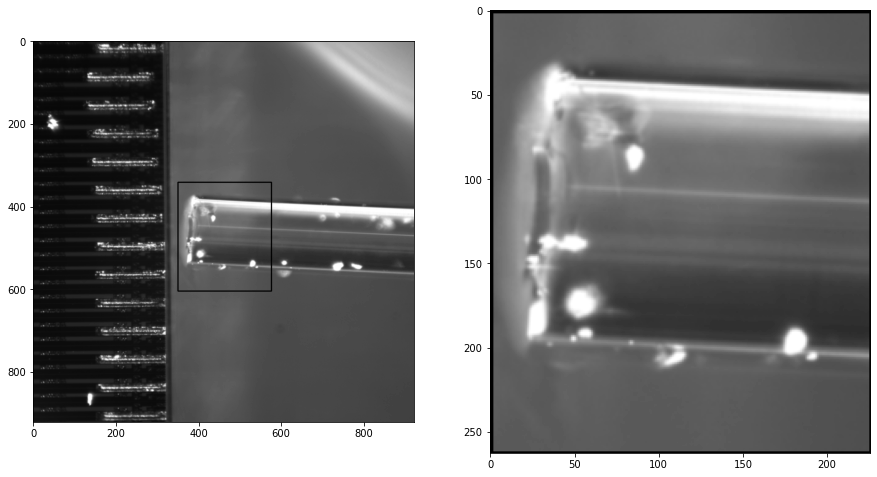

In [33]:
### Area of interest

## Input square
#New library
import argparse

img_bcopy = rescale (blur1,0.45)
img = img_bcopy.copy()

def click_event (event, x, y, flags, params):
    global coord, cropping  # array of arrays of coordinates for rectangle, indicate if cropping is taking place
    if event == cv.EVENT_LBUTTONDOWN: # detecting only left button event
        print (x, ' ', y) # printing coordinates
        coord =[(x,y)]
        cropping = True
        
    elif event == cv.EVENT_LBUTTONUP: # see if the left mouse if release
        coord.append((x,y))
        cropping = False

        #draw the rectangle in image
        cv.rectangle(img, coord[0], coord[1], (0,255,0), 2)
        cv.imshow('Area Selected', img) ## prints the image with the rectangle
        #print(coord[0])
        #print(coord[1])


cv.imshow('Area Selected',img) #if rescaling, you 
cv.setMouseCallback('Area Selected', click_event)
cv.waitKey(0)

x = coord[0][0]; y = coord[0][1]
w = coord[1][0]; h = coord[1][1] 
sub_image = img[y:h, x:w]

plt.figure(figsize=[15,12])
plt.subplot(121); plt.imshow(img, cmap='gray')
plt.subplot(122); plt.imshow(sub_image, cmap='gray')
plt.show()

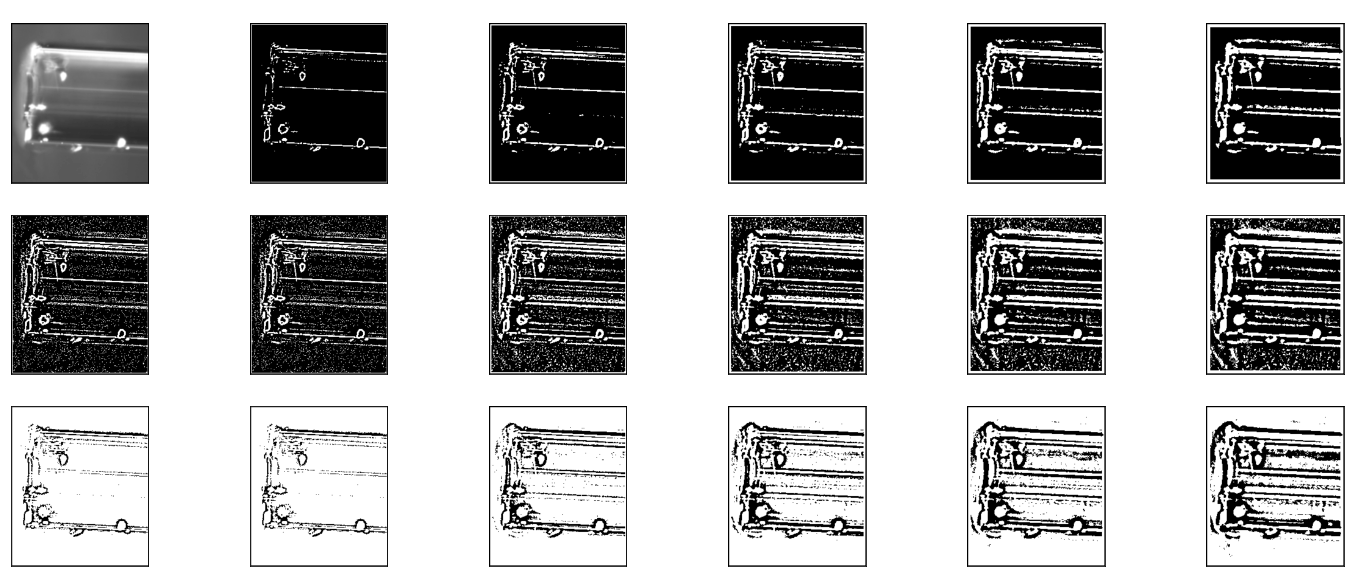

In [34]:
### Adaptive Thresholding of first figure, varying both parameters
 
bs = [3, 5, 7, 9, 11] ##blocksize x blocksize
c = [-2, 0, 2] ##pixel

titles = ['Original Image','BS=3','BS=5','BS=7','BS=9','BS=11']
images = []

images.append(sub_image)

plt.figure(figsize=[25,10])
for j in range(3):
    for i in range(6):
        if i != 0 & j==0:
            images.append(cv.adaptiveThreshold(sub_image,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,bs[i-1],c[j]))
        elif j > 0:
            images.append(cv.adaptiveThreshold(sub_image,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,bs[i],c[j]))
        plt.subplot(3,6,6*j+i+1),plt.imshow(images[6*j+i],'gray',vmin=0,vmax=255)
        if j==0:
            plt.title(titles[i], color = 'white')
        plt.xticks([]),plt.yticks([])
    #plt.show()
plt.show()

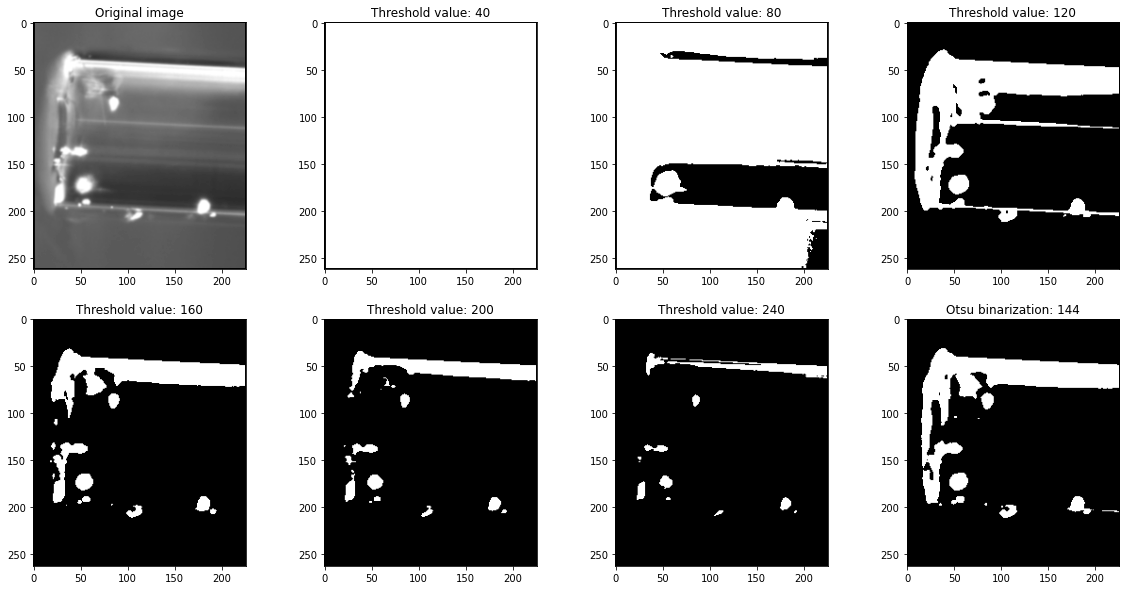

In [42]:
### Simple Thresholding with different threshold values
 
threshold_value = [40, 80, 120, 160, 200, 240]

plt.figure(figsize=[20,10])
for i in range(8):
    if i==0:
        plt.subplot(2,4,i+1),plt.imshow(sub_image,'gray',vmin=0,vmax=255)
        plt.title("Original image")
        #plt.xticks([]),plt.yticks([])            
    elif i==7:
        ret8,thresh8 = cv.threshold(sub_image,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
        plt.subplot(2,4,i+1),plt.imshow(thresh8,'gray',vmin=0,vmax=255)
        plt.title("Otsu binarization: " + str(int(ret8)))
    else:
        reti,threshi = cv.threshold(sub_image,threshold_value[i-1],255,cv.THRESH_BINARY)
        plt.subplot(2,4,i+1),plt.imshow(threshi,'gray',vmin=0,vmax=255)
        plt.title("Threshold value: " + str(threshold_value[i-1]))
        #plt.xticks([]),plt.yticks([])
    
plt.show()

In [21]:
### Moveable horizontal lines

# Actual mouse callback function
def move_line(event, x, y, flags, param):

    # Controls and image need to be global
    global diff, img, hold, l, t

    # Left mouse button down: Save mouse position where line was dragged
    if (event == cv.EVENT_LBUTTONDOWN) and \
            (x >= l) and \
            (x <= l + 950) and \
            (y >= t) and \
            (y <= t + 9):
        diff = (x - l, y - t)
        hold = True

    # Left mouse button up: Stop dragging
    elif event == cv.EVENT_LBUTTONUP:
        hold = False

    # During dragging: Update line w.r.t. mouse position; show image
    if hold:
        l, t = (x - diff[0], y - diff[1])
        img_copy = img.copy()
        cv.rectangle(img_copy, (l, t), (l + 950, t + 9), (0, 0, 255), cv.FILLED)
        cv.imshow('image', img_copy)

# Set up some image; work on copy
img = rescale (blur1,0.45)
img_copy = img.copy()

# Initialize controls
diff = (0, 0)
hold = False
l, t = (0, 200) #x and y

# Initialize line; show image
cv.rectangle(img_copy, (l, t), (l + 950, t + 9), (0, 0, 255), cv.FILLED) # Arguments: image, start_point, end_point, color, thickness
cv.imshow('image', img_copy)
cv.setMouseCallback('image', move_line)
cv.waitKey(0)

line = [(l,t),(l+400,t+9)]

print (line[0], ' ', line[1])

(0, 200)   (400, 209)
